In [1]:
import numpy as np
import matplotlib.pyplot as pl
import matplotlib.ticker as tk

In [2]:
P = np.array ([
    [1, 2, 2, 3, 3, 2, 2, 4, 4, 1, 1],
    [1, 1, 2, 2, 3, 3, 4, 4, 5, 5, 1],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
])

In [3]:
def Rot (axs, phi):
    t = phi * np.pi / 180
    c = np.cos (t)
    s = np.sin (t)
    d = 1 - c
    axslen = np.sqrt (axs.T @ axs)
    n = axs /  axslen [0, 0]
    a11 = c + n [0, 0] ** 2 * d
    a22 = c + n [1, 0] ** 2 * d
    a33 = c + n [2, 0] ** 2 * d
    a12 = n [0, 0] * n [1, 0] * d - n [2, 0] * s
    a13 = n [0, 0] * n [2, 0] * d - n [1, 0] * s
    a23 = n [1, 0] * n [2, 0] * d - n [0, 0] * s
    return np.array ([
        [a11, a12, a13, 0.0],
        [a12, a22, a23, 0.0],
        [a13, a23, a33, 0.0],
        [0.0, 0.0, 0.0, 1.0]
    ])

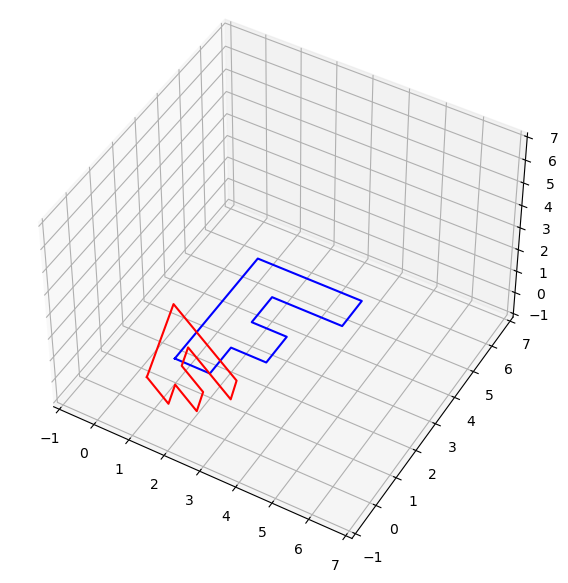

In [4]:
fig, ax = pl.subplots (figsize = (7, 7), subplot_kw = { "projection": "3d" })
ax.view_init (azim = -60, elev = 45)
ax.set_xlim (-1, 7)
ax.set_ylim (-1, 7)
ax.set_zlim (-1, 7)

ax.plot (P [0, :], P [1, :], P [2, :], 'blue')

Q = Rot (np.array ([[1], [1], [1]]), 45) @ P
ax.plot (Q [0, :], Q [1, :], Q [2, :], 'red')

In [5]:
def Trans (p):
    return np.array ([
        [1, 0, 0, p [0, 0]],
        [0, 1, 0, p [1, 0]],
        [0, 0, 1, p [2, 0]],
        [0, 0, 0, 1]
    ])

In [6]:
def ROT (pnt, axs, phi):
    return Trans (pnt) @ Rot (axs, phi) @ Trans (- pnt)

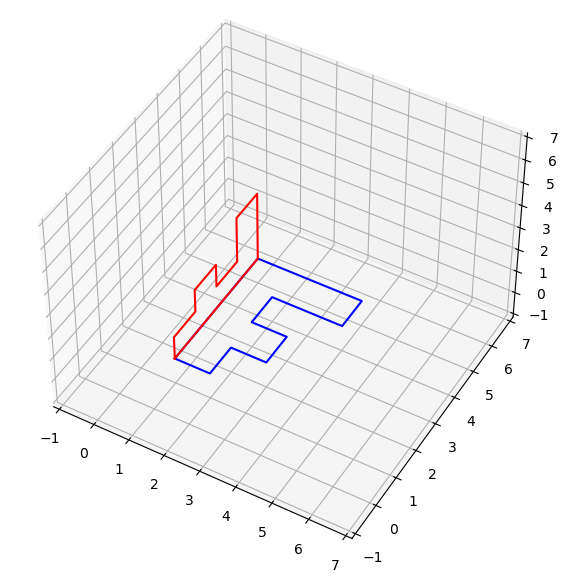

In [7]:
fig, ax = pl.subplots (figsize = (7, 7), subplot_kw = { "projection": "3d" })
ax.view_init (azim = -60, elev = 45)
ax.set_xlim (-1, 7)
ax.set_ylim (-1, 7)
ax.set_zlim (-1, 7)

ax.plot (P [0, :], P [1, :], P [2, :], 'blue')

Q = ROT (np.array ([[1], [1], [0]]), np.array ([[0], [1], [0]]), -90) @ P
ax.plot (Q [0, :], Q [1, :], Q [2, :], 'red')